# Setup

In [148]:
import numpy as np
import pandas as pd
import os

In [149]:
from collections import defaultdict

In [150]:
%matplotlib inline
import matplotlib.pyplot as plt

In [151]:
import seaborn as sns

In [152]:
sns.set(style='whitegrid', font_scale=1.6)

# Load NHANES demographics dataset

NHANES 2003-04 demographics dataset can be found here:

<https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Demographics&CycleBeginYear=2003>

With specific documentation about each column here:

<https://wwwn.cdc.gov/Nchs/Nhanes/2003-2004/DEMO_C.htm>

In [153]:
if not os.path.exists('DEMO_C.XPT'):
    !wget https://wwwn.cdc.gov/Nchs/Nhanes/2003-2004/DEMO_C.XPT
demog_df = pd.read_sas('DEMO_C.XPT')
demog_df.head()

,SEQN,SDDSRVYR,RIDSTATR,RIDEXMON,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDAGEEX,RIDRETH1,RIDRETH2,...,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANG,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA
0,21005.0,3.0,2.0,1.0,1.0,19.0,232.0,233.0,4.0,2.0,...,2.0,2.0,1.0,2.0,2.0,1.0,5512.320949,5824.782465,2.0,39.0
1,21006.0,3.0,2.0,2.0,2.0,16.0,203.0,205.0,4.0,2.0,...,2.0,2.0,1.0,2.0,2.0,1.0,5422.140453,5564.039715,1.0,41.0
2,21007.0,3.0,2.0,1.0,2.0,14.0,172.0,172.0,3.0,1.0,...,2.0,2.0,1.0,2.0,2.0,1.0,39764.177412,40591.066325,2.0,35.0
3,21008.0,3.0,2.0,2.0,1.0,17.0,208.0,209.0,4.0,2.0,...,2.0,2.0,1.0,2.0,2.0,1.0,5599.499351,5696.750596,1.0,32.0
4,21009.0,3.0,2.0,2.0,1.0,55.0,671.0,672.0,3.0,1.0,...,2.0,2.0,1.0,2.0,2.0,1.0,97593.678977,97731.727244,2.0,31.0


# Identify specific columns to include

In [154]:
column_map = {
    'income':'INDHHINC',
    'gender':'RIAGENDR',
    'age':'RIDAGEYR',
    'race':'RIDRETH1',
    'edu':'DMDEDUC2',
    'country_of_birth':'DMDBORN',
    'marital_status':'DMDMARTL',
    'language':'SIALANG',
}

In [155]:
columns_by_size = dict()
columns_by_size['2col'] = ['age', 'gender']
columns_by_size['4col'] =['age', 'gender', 'race', 'income']
columns_by_size['6col'] = ['age', 'gender', 'race', 'income', 'edu', 'country_of_birth']
columns_by_size['8col'] = ['age', 'gender', 'race', 'income', 'edu', 'country_of_birth', 'marital_status', 'language']

# Detailed descriptive stats for each column

In [156]:
MIN_FRAC_TO_COUNT_SIGNIFICANT = 0.005

count_sig = defaultdict(int)
count_all = defaultdict(int)
for col in columns_by_size['8col']:
    sas_name = column_map[col]
    df = demog_df[sas_name]
    df.values[:] = np.round(df.values, 8)
    df = df.astype('category')
    str_vals = np.asarray([str(s) for s in df.values], dtype=str)
    uvals = np.unique(str_vals)
    print("COLUMN %s (%s)" % (col, sas_name))
    total_count = 0
    for uval in uvals:
        count = np.sum(str_vals == uval)
        total_count += count
        frac = count / (1e-10 + len(str_vals))
        print("   value %8s has count %6d | frac %.3f" % (uval, count, frac))
        count_all[col] += 1
        if frac > MIN_FRAC_TO_COUNT_SIGNIFICANT:
            count_sig[col] += 1
    assert total_count == len(str_vals)

COLUMN age (RIDAGEYR)
   value      0.0 has count    477 | frac 0.047
   value      1.0 has count    341 | frac 0.034
   value     10.0 has count    178 | frac 0.018
   value     11.0 has count    169 | frac 0.017
   value     12.0 has count    276 | frac 0.027
   value     13.0 has count    299 | frac 0.030
   value     14.0 has count    298 | frac 0.029
   value     15.0 has count    258 | frac 0.025
   value     16.0 has count    287 | frac 0.028
   value     17.0 has count    306 | frac 0.030
   value     18.0 has count    290 | frac 0.029
   value     19.0 has count    289 | frac 0.029
   value      2.0 has count    305 | frac 0.030
   value     20.0 has count    102 | frac 0.010
   value     21.0 has count    106 | frac 0.010
   value     22.0 has count     93 | frac 0.009
   value     23.0 has count     79 | frac 0.008
   value     24.0 has count     93 | frac 0.009
   value     25.0 has count     91 | frac 0.009
   value     26.0 has count     94 | frac 0.009
   value     27.0 

In [157]:
for col in count_sig:
    val = count_sig[col]
    aval = count_all[col]
    print("COLUMN %25s has %3d significant values | %3d possible values" % (col, val, aval))

COLUMN            marital_status has   7 significant values |   7 possible values
COLUMN                  language has   2 significant values |   2 possible values
COLUMN                    gender has   2 significant values |   2 possible values
COLUMN                       age has  78 significant values |  86 possible values
COLUMN                    income has  12 significant values |  16 possible values
COLUMN                      race has   5 significant values |   5 possible values
COLUMN          country_of_birth has   3 significant values |   4 possible values
COLUMN                       edu has   6 significant values |   8 possible values


['age',
 'gender',
 'race',
 'income',
 'edu',
 'country_of_birth',
 'marital_status',
 'language']

In [176]:
def build_legend_with_cat_counts_for_cohort(
        demog_df,
        query_list=None,
        verbose=False,
        col_names=columns_by_size['8col'],
        which_levels_to_count='all', MIN_FRAC_TO_COUNT_SIGNIFICANT=0.005):
    count_sig = defaultdict(int)
    count_all = defaultdict(int)
    
    cohort_df = pd.DataFrame(
        np.hstack([demog_df[[column_map[c]]].values for c in col_names]),
        columns=col_names,
        )
    # Apply query if needed
    for query_str in query_list:
        cohort_df = cohort_df.query(query_str).copy()

    for col in col_names:
        df = cohort_df[col]
        df.values[:] = np.round(df.values, 8)
        df = df.astype('category')
        str_vals = np.asarray([str(s) for s in df.values], dtype=str)
        uvals = np.unique(str_vals)
        if verbose:
            print("COLUMN %s (%s)" % (col, sas_name))
        total_count = 0
        for uval in uvals:
            count = np.sum(str_vals == uval)
            total_count += count
            frac = count / (1e-10 + len(str_vals))
            if verbose:
                print("   value %8s has count %6d | frac %.3f" % (uval, count, frac))
            count_all[col] += 1
            if frac > MIN_FRAC_TO_COUNT_SIGNIFICANT:
                count_sig[col] += 1
        assert total_count == len(str_vals)
    if which_levels_to_count == 'all':
        count_ = count_all
    else:
        count_ = count_sig
    nicknames = {
        '2col':'2 vars : AGE (%d) & GENDER (%d)' % (count_['age'], count_['gender']),
        '4col':'4 vars : + RACE (%d) & INCOME (%d)' % (count_['race'], count_['income']),
        '6col':'6 vars : + EDU (%d) & COUNTRY (%d)' % (count_['edu'], count_['country_of_birth']),
        '8col':'8 vars : + MARITAL (%d) & LANG (%d)' % (count_['marital_status'], count_['language']),
    }
    return nicknames

# Define procedure to compute accuracy using specific columns

In [177]:
def calc_accuracy_for_specific_columns(demog_df, col_names, query_list=[], max_num_subjects=None, seed=0):

    cohort_df = pd.DataFrame(
        np.hstack([demog_df[[column_map[c]]].values for c in col_names]),
        columns=col_names,
        )

    ## Shuffle the cohort in place
    prng = np.random.RandomState(int(seed))
    prng.shuffle(cohort_df.values)
    
    print("")
    print("Cohort has shape %s before filtering" % str(cohort_df.shape))
    print(cohort_df.head())
    
    # Apply query if needed
    for query_str in query_list:
        cohort_df = cohort_df.query(query_str).copy()
    
    # Keep the first N subjects if needed
    if max_num_subjects is not None:
        cohort_df = cohort_df.head(int(max_num_subjects)).copy()
    print("Cohort has shape %s after filtering" % str(cohort_df.shape))
    ## Represent each subject as a unique string
    rowstr_list = [str(v) for v in cohort_df.values]
    
    ## Compute all unique strings in the cohort and how many of each kind there are
    unique_rowstr_U, counts_U = np.unique(rowstr_list, return_counts=True)
    n_subj_total = cohort_df.shape[0]
    n_correct_total = 0
    for count in np.unique(counts_U):
        pr_correct_per_guess = 1.0 / float(count)
        n_subj_that_match_ct = np.sum(counts_U[counts_U == count])
        est_correct_guess_at_ct = n_subj_that_match_ct * pr_correct_per_guess
        n_correct_total += est_correct_guess_at_ct
    acc = float(n_correct_total) / (1e-10 + float(n_subj_total))
    print("%.3f accuracy : %5d correct / %5d total subjects" % (
        acc, n_correct_total, n_subj_total))
    return acc, n_subj_total

In [78]:
calc_accuracy_for_specific_columns(demog_df, columns_by_size['6col'], max_num_subjects=4700, query_list=['age >= 20'], seed=111)


Cohort has shape (10122, 6) before filtering
    age  gender  race  income  edu  country_of_birth
0  70.0     1.0   3.0     5.0  4.0               1.0
1   9.0     1.0   4.0    11.0  NaN               1.0
2  33.0     2.0   3.0     8.0  3.0               1.0
3   6.0     2.0   3.0    11.0  NaN               1.0
4  77.0     2.0   3.0     9.0  3.0               3.0
Cohort has shape (4700, 6) after filtering
0.831 accuracy :  3905 correct /  4700 total subjects


(0.8308510638297696, 4700)

In [119]:
max_num_subjects_grid = [200, 400, 800, 1600, 3200, 6400, 12800]
featsize_grid = ['2col', '4col', '6col', '8col']
query_list_grid = {
    'adults_only':['age >= 20'],
    'all_subjects':[],
    }
results_dict_list = list()

for query_name, query_list in query_list_grid.items():
    for featsize_key in featsize_grid:
        for max_num_subjects in max_num_subjects_grid:
                print("")
                print("------------- BEGIN %s feats %s num_subj %d" % (query_name, featsize_key, max_num_subjects))
                acc_list = list()
                for seed in [101, 202, 303, 404, 505]:
                    acc, max_num = calc_accuracy_for_specific_columns(
                        demog_df, columns_by_size[featsize_key],
                        query_list=query_list,
                        max_num_subjects=max_num_subjects,
                        seed=seed)
                    acc_list.append(acc)
                    ## Early stopping if random subsampling isn't needed
                    if max_num == max_num_subjects_grid[-1] or max_num < max_num_subjects:
                        break
                mean_acc = np.mean(acc_list)

                print("------------- END   %s feats %s num_subj %d" % (query_name, featsize_key, max_num_subjects))
                print("mean acc %.3f from %d trials" % (mean_acc, len(acc_list)))
                results_dict = dict(
                    acc=mean_acc, featsize=featsize_key, query_name=query_name, num_subjects=max_num)
                results_dict_list.append(results_dict)
            
results_df = pd.DataFrame(results_dict_list)


------------- BEGIN all_subjects feats 2col num_subj 200

Cohort has shape (10122, 2) before filtering
    age  gender
0  68.0     1.0
1  67.0     1.0
2  16.0     2.0
3   4.0     2.0
4  62.0     2.0
Cohort has shape (200, 2) after filtering
0.545 accuracy :   109 correct /   200 total subjects

Cohort has shape (10122, 2) before filtering
    age  gender
0  18.0     2.0
1  47.0     2.0
2   7.0     1.0
3   5.0     2.0
4  70.0     2.0
Cohort has shape (200, 2) after filtering
0.550 accuracy :   110 correct /   200 total subjects

Cohort has shape (10122, 2) before filtering
    age  gender
0  74.0     2.0
1   1.0     1.0
2  41.0     2.0
3  32.0     2.0
4  31.0     1.0
Cohort has shape (200, 2) after filtering
0.500 accuracy :   100 correct /   200 total subjects

Cohort has shape (10122, 2) before filtering
    age  gender
0  26.0     1.0
1  31.0     2.0
2  50.0     1.0
3   6.0     1.0
4  54.0     1.0
Cohort has shape (200, 2) after filtering
0.485 accuracy :    97 correct /   200 total

0.017 accuracy :   172 correct / 10122 total subjects
------------- END   all_subjects feats 2col num_subj 12800
mean acc 0.017 from 1 trials

------------- BEGIN all_subjects feats 4col num_subj 200

Cohort has shape (10122, 4) before filtering
    age  gender  race  income
0  68.0     1.0   1.0     3.0
1  67.0     1.0   1.0     7.0
2  16.0     2.0   4.0     5.0
3   4.0     2.0   1.0    11.0
4  62.0     2.0   1.0     5.0
Cohort has shape (200, 4) after filtering
0.975 accuracy :   195 correct /   200 total subjects

Cohort has shape (10122, 4) before filtering
    age  gender  race  income
0  18.0     2.0   1.0    10.0
1  47.0     2.0   1.0     3.0
2   7.0     1.0   1.0     3.0
3   5.0     2.0   3.0     7.0
4  70.0     2.0   5.0     3.0
Cohort has shape (200, 4) after filtering
0.980 accuracy :   196 correct /   200 total subjects

Cohort has shape (10122, 4) before filtering
    age  gender  race  income
0  74.0     2.0   3.0     6.0
1   1.0     1.0   4.0     2.0
2  41.0     2.0   4.

0.695 accuracy :  2223 correct /  3200 total subjects

Cohort has shape (10122, 4) before filtering
    age  gender  race  income
0  14.0     1.0   3.0    11.0
1  60.0     2.0   4.0     6.0
2  16.0     2.0   4.0     3.0
3  18.0     1.0   1.0     7.0
4  48.0     2.0   4.0    11.0
Cohort has shape (3200, 4) after filtering
0.682 accuracy :  2183 correct /  3200 total subjects
------------- END   all_subjects feats 4col num_subj 3200
mean acc 0.693 from 5 trials

------------- BEGIN all_subjects feats 4col num_subj 6400

Cohort has shape (10122, 4) before filtering
    age  gender  race  income
0  68.0     1.0   1.0     3.0
1  67.0     1.0   1.0     7.0
2  16.0     2.0   4.0     5.0
3   4.0     2.0   1.0    11.0
4  62.0     2.0   1.0     5.0
Cohort has shape (6400, 4) after filtering
0.545 accuracy :  3487 correct /  6400 total subjects

Cohort has shape (10122, 4) before filtering
    age  gender  race  income
0  18.0     2.0   1.0    10.0
1  47.0     2.0   1.0     3.0
2   7.0     1.0   

0.931 accuracy :   745 correct /   800 total subjects

Cohort has shape (10122, 6) before filtering
    age  gender  race  income  edu  country_of_birth
0  74.0     2.0   3.0     6.0  2.0               1.0
1   1.0     1.0   4.0     2.0  NaN               1.0
2  41.0     2.0   4.0    11.0  4.0               1.0
3  32.0     2.0   3.0     6.0  4.0               1.0
4  31.0     1.0   3.0    11.0  5.0               1.0
Cohort has shape (800, 6) after filtering
0.934 accuracy :   747 correct /   800 total subjects

Cohort has shape (10122, 6) before filtering
    age  gender  race  income  edu  country_of_birth
0  26.0     1.0   4.0    11.0  4.0               1.0
1  31.0     2.0   1.0     3.0  3.0               2.0
2  50.0     1.0   3.0    11.0  5.0               1.0
3   6.0     1.0   4.0    11.0  NaN               3.0
4  54.0     1.0   3.0     2.0  2.0               1.0
Cohort has shape (800, 6) after filtering
0.919 accuracy :   735 correct /   800 total subjects

Cohort has shape (10122, 

0.676 accuracy :  4326 correct /  6400 total subjects

Cohort has shape (10122, 6) before filtering
    age  gender  race  income  edu  country_of_birth
0  14.0     1.0   3.0    11.0  NaN               3.0
1  60.0     2.0   4.0     6.0  2.0               1.0
2  16.0     2.0   4.0     3.0  NaN               1.0
3  18.0     1.0   1.0     7.0  NaN               1.0
4  48.0     2.0   4.0    11.0  5.0               1.0
Cohort has shape (6400, 6) after filtering
0.662 accuracy :  4239 correct /  6400 total subjects
------------- END   all_subjects feats 6col num_subj 6400
mean acc 0.671 from 5 trials

------------- BEGIN all_subjects feats 6col num_subj 12800

Cohort has shape (10122, 6) before filtering
    age  gender  race  income  edu  country_of_birth
0  68.0     1.0   1.0     3.0  1.0               1.0
1  67.0     1.0   1.0     7.0  4.0               1.0
2  16.0     2.0   4.0     5.0  NaN               1.0
3   4.0     2.0   1.0    11.0  NaN               2.0
4  62.0     2.0   1.0     5

0.954 accuracy :   763 correct /   800 total subjects

Cohort has shape (10122, 8) before filtering
    age  gender  race  income  edu  country_of_birth  marital_status  language
0  18.0     2.0   1.0    10.0  NaN               1.0             5.0       1.0
1  47.0     2.0   1.0     3.0  2.0               1.0             4.0       1.0
2   7.0     1.0   1.0     3.0  NaN               2.0             NaN       2.0
3   5.0     2.0   3.0     7.0  NaN               1.0             NaN       1.0
4  70.0     2.0   5.0     3.0  1.0               3.0             2.0       1.0
Cohort has shape (800, 8) after filtering
0.945 accuracy :   756 correct /   800 total subjects

Cohort has shape (10122, 8) before filtering
    age  gender  race  income  edu  country_of_birth  marital_status  language
0  74.0     2.0   3.0     6.0  2.0               1.0             1.0       1.0
1   1.0     1.0   4.0     2.0  NaN               1.0             NaN       1.0
2  41.0     2.0   4.0    11.0  4.0             

0.815 accuracy :  2608 correct /  3200 total subjects

Cohort has shape (10122, 8) before filtering
    age  gender  race  income  edu  country_of_birth  marital_status  language
0  14.0     1.0   3.0    11.0  NaN               3.0             5.0       1.0
1  60.0     2.0   4.0     6.0  2.0               1.0             5.0       1.0
2  16.0     2.0   4.0     3.0  NaN               1.0             5.0       1.0
3  18.0     1.0   1.0     7.0  NaN               1.0             5.0       1.0
4  48.0     2.0   4.0    11.0  5.0               1.0             6.0       1.0
Cohort has shape (3200, 8) after filtering
0.808 accuracy :  2586 correct /  3200 total subjects
------------- END   all_subjects feats 8col num_subj 3200
mean acc 0.814 from 5 trials

------------- BEGIN all_subjects feats 8col num_subj 6400

Cohort has shape (10122, 8) before filtering
    age  gender  race  income  edu  country_of_birth  marital_status  language
0  68.0     1.0   1.0     3.0  1.0               1.0      

0.164 accuracy :   131 correct /   800 total subjects

Cohort has shape (10122, 2) before filtering
    age  gender
0  14.0     1.0
1  60.0     2.0
2  16.0     2.0
3  18.0     1.0
4  48.0     2.0
Cohort has shape (800, 2) after filtering
0.164 accuracy :   131 correct /   800 total subjects
------------- END   adults_only feats 2col num_subj 800
mean acc 0.164 from 5 trials

------------- BEGIN adults_only feats 2col num_subj 1600

Cohort has shape (10122, 2) before filtering
    age  gender
0  68.0     1.0
1  67.0     1.0
2  16.0     2.0
3   4.0     2.0
4  62.0     2.0
Cohort has shape (1600, 2) after filtering
0.082 accuracy :   132 correct /  1600 total subjects

Cohort has shape (10122, 2) before filtering
    age  gender
0  18.0     2.0
1  47.0     2.0
2   7.0     1.0
3   5.0     2.0
4  70.0     2.0
Cohort has shape (1600, 2) after filtering
0.082 accuracy :   132 correct /  1600 total subjects

Cohort has shape (10122, 2) before filtering
    age  gender
0  74.0     2.0
1   1.0  

0.877 accuracy :   702 correct /   800 total subjects

Cohort has shape (10122, 4) before filtering
    age  gender  race  income
0  26.0     1.0   4.0    11.0
1  31.0     2.0   1.0     3.0
2  50.0     1.0   3.0    11.0
3   6.0     1.0   4.0    11.0
4  54.0     1.0   3.0     2.0
Cohort has shape (800, 4) after filtering
0.872 accuracy :   698 correct /   800 total subjects

Cohort has shape (10122, 4) before filtering
    age  gender  race  income
0  14.0     1.0   3.0    11.0
1  60.0     2.0   4.0     6.0
2  16.0     2.0   4.0     3.0
3  18.0     1.0   1.0     7.0
4  48.0     2.0   4.0    11.0
Cohort has shape (800, 4) after filtering
0.871 accuracy :   697 correct /   800 total subjects
------------- END   adults_only feats 4col num_subj 800
mean acc 0.869 from 5 trials

------------- BEGIN adults_only feats 4col num_subj 1600

Cohort has shape (10122, 4) before filtering
    age  gender  race  income
0  68.0     1.0   1.0     3.0
1  67.0     1.0   1.0     7.0
2  16.0     2.0   4.0  

0.980 accuracy :   392 correct /   400 total subjects

Cohort has shape (10122, 6) before filtering
    age  gender  race  income  edu  country_of_birth
0  74.0     2.0   3.0     6.0  2.0               1.0
1   1.0     1.0   4.0     2.0  NaN               1.0
2  41.0     2.0   4.0    11.0  4.0               1.0
3  32.0     2.0   3.0     6.0  4.0               1.0
4  31.0     1.0   3.0    11.0  5.0               1.0
Cohort has shape (400, 6) after filtering
0.987 accuracy :   395 correct /   400 total subjects

Cohort has shape (10122, 6) before filtering
    age  gender  race  income  edu  country_of_birth
0  26.0     1.0   4.0    11.0  4.0               1.0
1  31.0     2.0   1.0     3.0  3.0               2.0
2  50.0     1.0   3.0    11.0  5.0               1.0
3   6.0     1.0   4.0    11.0  NaN               3.0
4  54.0     1.0   3.0     2.0  2.0               1.0
Cohort has shape (400, 6) after filtering
0.975 accuracy :   390 correct /   400 total subjects

Cohort has shape (10122, 

0.877 accuracy :  2808 correct /  3200 total subjects

Cohort has shape (10122, 6) before filtering
    age  gender  race  income  edu  country_of_birth
0  14.0     1.0   3.0    11.0  NaN               3.0
1  60.0     2.0   4.0     6.0  2.0               1.0
2  16.0     2.0   4.0     3.0  NaN               1.0
3  18.0     1.0   1.0     7.0  NaN               1.0
4  48.0     2.0   4.0    11.0  5.0               1.0
Cohort has shape (3200, 6) after filtering
0.867 accuracy :  2773 correct /  3200 total subjects
------------- END   adults_only feats 6col num_subj 3200
mean acc 0.871 from 5 trials

------------- BEGIN adults_only feats 6col num_subj 6400

Cohort has shape (10122, 6) before filtering
    age  gender  race  income  edu  country_of_birth
0  68.0     1.0   1.0     3.0  1.0               1.0
1  67.0     1.0   1.0     7.0  4.0               1.0
2  16.0     2.0   4.0     5.0  NaN               1.0
3   4.0     2.0   1.0    11.0  NaN               2.0
4  62.0     2.0   1.0     5.0 

0.975 accuracy :   780 correct /   800 total subjects

Cohort has shape (10122, 8) before filtering
    age  gender  race  income  edu  country_of_birth  marital_status  language
0  18.0     2.0   1.0    10.0  NaN               1.0             5.0       1.0
1  47.0     2.0   1.0     3.0  2.0               1.0             4.0       1.0
2   7.0     1.0   1.0     3.0  NaN               2.0             NaN       2.0
3   5.0     2.0   3.0     7.0  NaN               1.0             NaN       1.0
4  70.0     2.0   5.0     3.0  1.0               3.0             2.0       1.0
Cohort has shape (800, 8) after filtering
0.980 accuracy :   784 correct /   800 total subjects

Cohort has shape (10122, 8) before filtering
    age  gender  race  income  edu  country_of_birth  marital_status  language
0  74.0     2.0   3.0     6.0  2.0               1.0             1.0       1.0
1   1.0     1.0   4.0     2.0  NaN               1.0             NaN       1.0
2  41.0     2.0   4.0    11.0  4.0             

0.926 accuracy :  2963 correct /  3200 total subjects

Cohort has shape (10122, 8) before filtering
    age  gender  race  income  edu  country_of_birth  marital_status  language
0  14.0     1.0   3.0    11.0  NaN               3.0             5.0       1.0
1  60.0     2.0   4.0     6.0  2.0               1.0             5.0       1.0
2  16.0     2.0   4.0     3.0  NaN               1.0             5.0       1.0
3  18.0     1.0   1.0     7.0  NaN               1.0             5.0       1.0
4  48.0     2.0   4.0    11.0  5.0               1.0             6.0       1.0
Cohort has shape (3200, 8) after filtering
0.920 accuracy :  2945 correct /  3200 total subjects
------------- END   adults_only feats 8col num_subj 3200
mean acc 0.922 from 5 trials

------------- BEGIN adults_only feats 8col num_subj 6400

Cohort has shape (10122, 8) before filtering
    age  gender  race  income  edu  country_of_birth  marital_status  language
0  68.0     1.0   1.0     3.0  1.0               1.0        

# Create plot for adults only

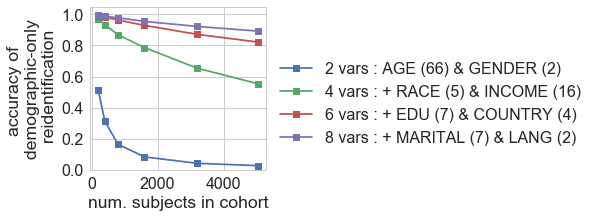

In [190]:
query_name = 'adults_only'
max_query = results_df.query("query_name == '%s'" % query_name)['num_subjects'].max()
plt.figure(figsize=(max_query / 1600., 3))

label_legend = build_legend_with_cat_counts_for_cohort(
    demog_df,
    query_list=query_list_grid[query_name],
)
    
for featsize_key in featsize_grid:
    query_str = "query_name == '%s' and featsize == '%s'" % (query_name, featsize_key)
    cur_res_df = results_df.query(query_str)
    plt.plot(cur_res_df['num_subjects'], cur_res_df['acc'], 's-', label=label_legend[featsize_key])
plt.xlabel('num. subjects in cohort')
plt.ylabel('accuracy of \n demographic-only \n reidentification')
plt.legend(bbox_to_anchor=(1.0, 0.75))
plt.xticks(np.arange(0, 5000+1, 2000))
plt.yticks(np.linspace(0.0, 1.0, 6));
plt.ylim([0.0, 1.05]);
plt.savefig('NHANES-acc_vs_cohort_size-%s.png' % query_name)

# Create accuracy plot for all subjects

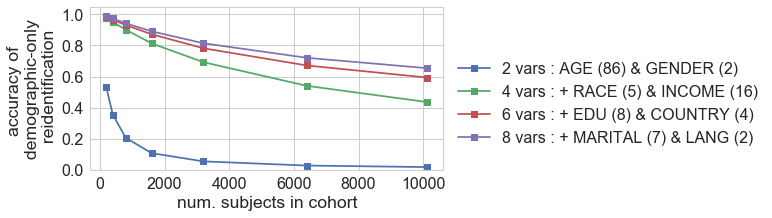

In [191]:
query_name = 'all_subjects'
max_query = results_df.query("query_name == '%s'" % query_name)['num_subjects'].max()
plt.figure(figsize=(max_query / 1600., 3))

label_legend = build_legend_with_cat_counts_for_cohort(
    demog_df,
    query_list=query_list_grid[query_name],
)

for featsize_key in featsize_grid:
    query_str = "query_name == '%s' and featsize == '%s'" % (query_name, featsize_key)
    cur_res_df = results_df.query(query_str)
    plt.plot(cur_res_df['num_subjects'], cur_res_df['acc'], 's-', label=label_legend[featsize_key])
plt.xlabel('num. subjects in cohort')
plt.ylabel('accuracy of \n demographic-only \n reidentification')
plt.legend(bbox_to_anchor=(1.0, 0.75))
plt.xticks(np.arange(0, 10000+1, 2000))
plt.yticks(np.linspace(0.0, 1.0, 6));
plt.ylim([0.0, 1.05]);
plt.savefig('NHANES-acc_vs_cohort_size-%s.png' % query_name, bbox_inches='tight', pad_inches=0)